# Predicting the price of pre-owned cars

#### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Setting dimensions for plot 

sns.set(rc = {'figure.figsize':(10, 7)})

### Reading the CSV file

In [6]:
cars_data = pd.read_csv('cars_sampled.csv')

### Creating copy

In [8]:
cars = cars_data.copy()

In [9]:
# printing the first 5 rows of the dataset

cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [10]:
cars.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15
50000,22/03/2016 9:54,Chevrolet_Matiz_1.Hd_TÜV11/2017,commercial,offer,1100,test,small car,2006,manual,38,matiz,150000,10,petrol,chevrolet,no,22/03/2016 0:00,7973,5/4/2016 21:15


### Structure of Data

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

### Summarizing data

In [14]:
# five point summary of the data

cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [16]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [17]:
# To display maximum set of columns

pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


### Dropping unwanted columns

In [19]:
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns = col, axis = 1)

### Removing duplicate records

In [21]:
cars.drop_duplicates(keep = 'first', inplace = True)

### Data Cleaning

In [23]:
# Number of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [24]:
# Variable yearofRegistration

yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()
yearwise_count.head(10)

yearOfRegistration
1000     6
1255     1
1500     2
1910    14
1928     1
1929     1
1933     1
1934     1
1936     2
1938     1
Name: count, dtype: int64

In [25]:
sum(cars['yearOfRegistration'] > 2018)

26

In [26]:
sum(cars['yearOfRegistration'] < 1950)

38

<Axes: xlabel='yearOfRegistration', ylabel='price'>

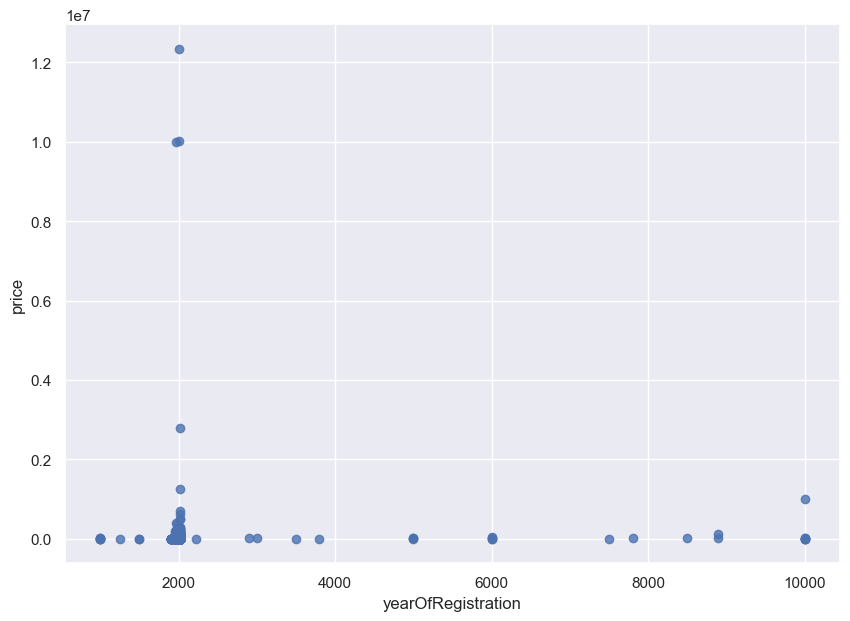

In [27]:
sns.regplot(x = 'yearOfRegistration', y = 'price', scatter = True, fit_reg = False, data = cars)
# work range will be 1950 to 2018

In [28]:
# Variable price

price_count = cars['price'].value_counts().sort_index()
price_count.tail(10)

price
485000      1
487000      1
619000      1
700000      1
999999      1
1250000     1
2795000     1
9999999     1
10010011    1
12345678    1
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

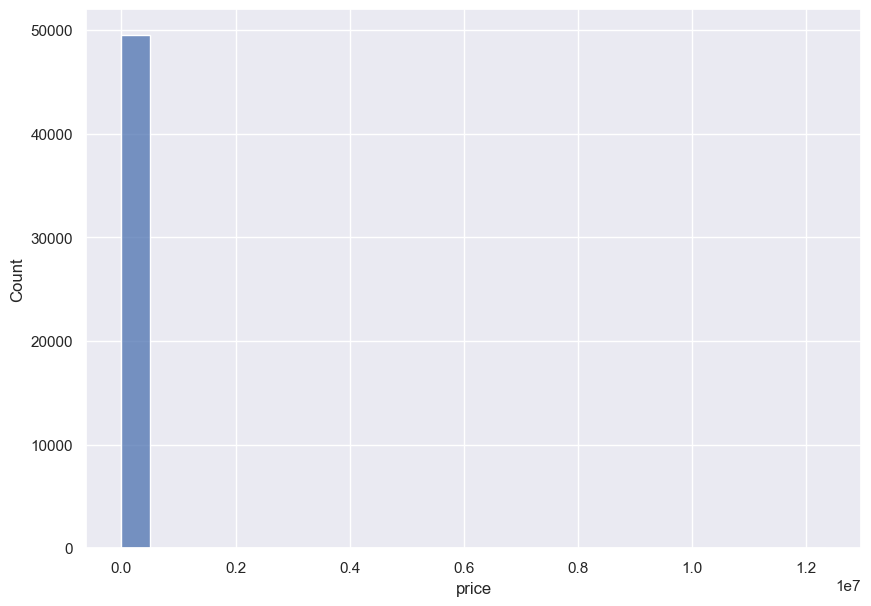

In [29]:
sns.histplot(cars['price'], bins = 25)

In [30]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<Axes: ylabel='price'>

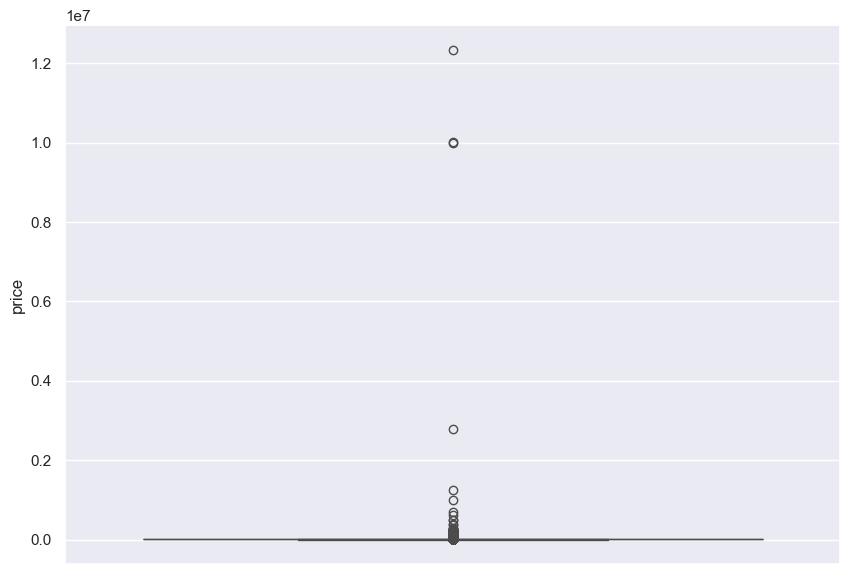

In [31]:
sns.boxplot(y = cars['price'])

In [32]:
sum(cars['price'] > 150000)

34

In [33]:
sum(cars['price'] < 100)
# working range I am choosing is 100 to 150000

1748

In [34]:
# Variable powerPS

power_count = cars['powerPS'].value_counts().sort_index()
power_count.head(10)

powerPS
0     5533
1        3
2        2
3        2
4        4
5       17
6        2
7        1
9        1
10       2
Name: count, dtype: int64

<Axes: xlabel='powerPS', ylabel='Count'>

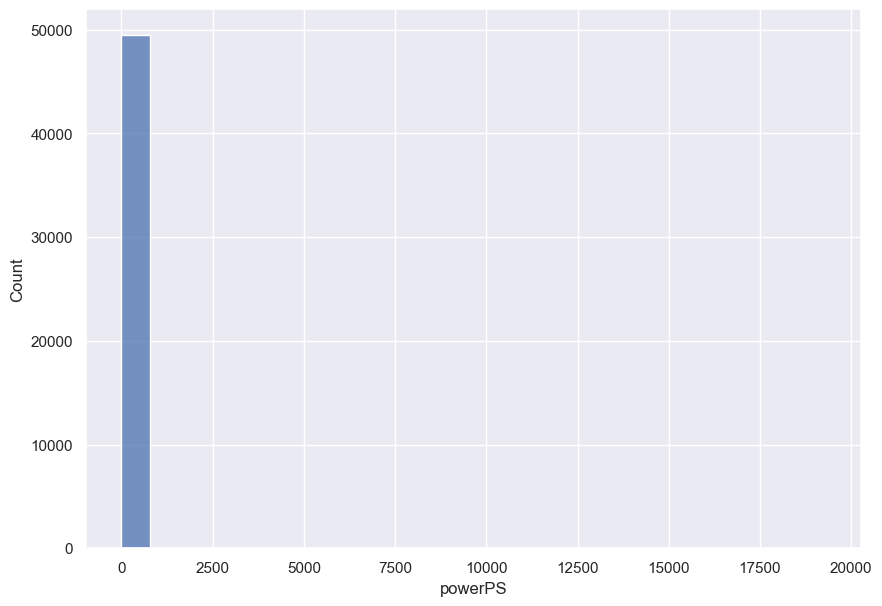

In [35]:
sns.histplot(cars['powerPS'], bins = 25)

In [36]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

<Axes: ylabel='powerPS'>

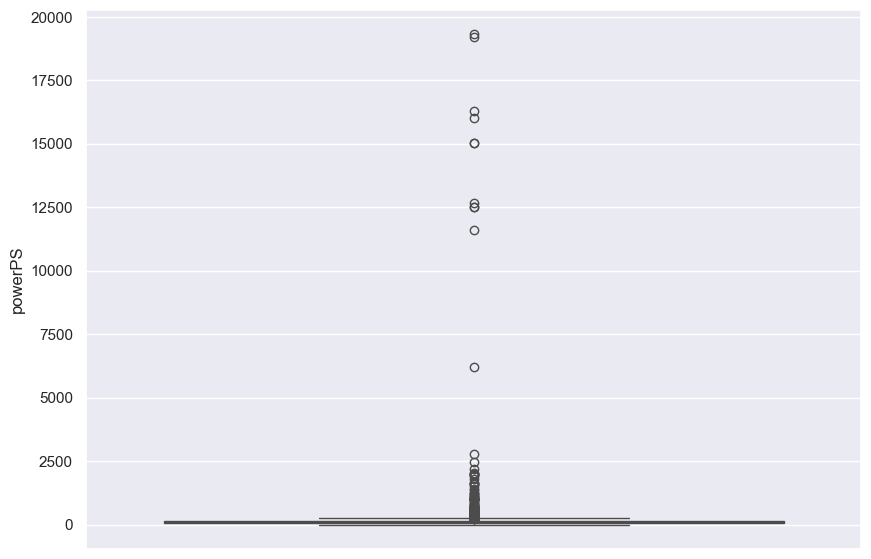

In [37]:
sns.boxplot(y = cars['powerPS'])

<Axes: xlabel='powerPS', ylabel='price'>

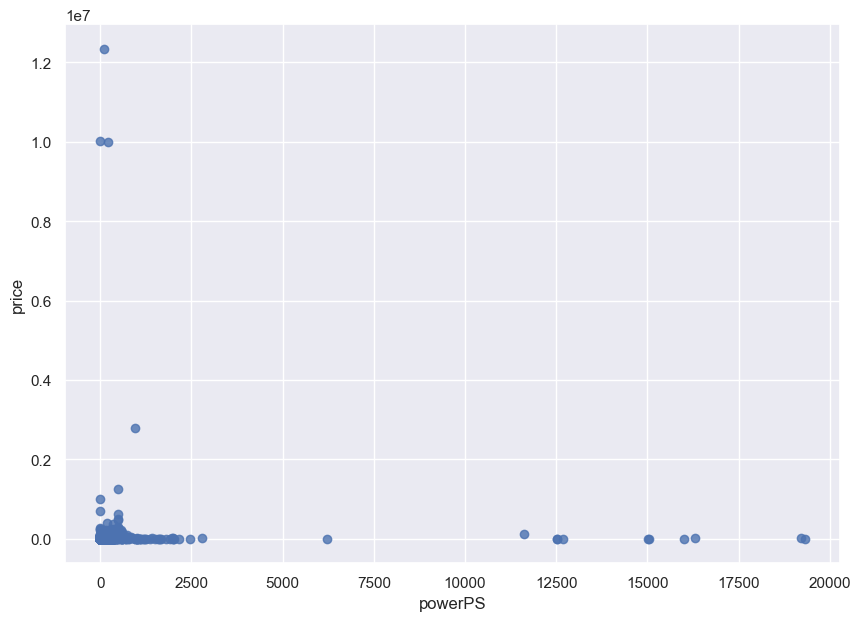

In [38]:
sns.regplot(x = 'powerPS', y = 'price', scatter = True, fit_reg = False, data = cars)

In [39]:
sum(cars['powerPS'] > 500)

115

In [40]:
sum(cars['powerPS'] < 10)
# Working range- 10 and 500

5565

### Working range of data

In [42]:
cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]
# ~6700 records are dropped

In [43]:
# Further to simplify- variable reduction

# Combining yearOfRegistration and monthOfRegistration

In [44]:
cars['monthOfRegistration']/=12

In [45]:
# Creating new varible Age by adding yearOfRegistration and monthOfRegistration

cars['Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']

In [46]:
cars['Age'] = round(cars['Age'], 2)

In [47]:
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [48]:
# Dropping yearOfRegistration and monthOfRegistration

cars = cars.drop(columns = ['yearOfRegistration','monthOfRegistration'], axis = 1)

In [49]:
cars.head(10)

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
5,private,offer,988,test,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.170
7,private,offer,1399,test,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.920
8,private,offer,4680,test,station wagon,manual,122,vectra,150000,petrol,opel,no,14.000
9,private,offer,8340,test,limousine,automatic,140,octavia,125000,diesel,skoda,no,13.330
10,private,offer,1870,control,limousine,manual,82,a_klasse,150000,petrol,mercedes_benz,no,17.080


### Visualizing parameters

<Axes: xlabel='Age', ylabel='Count'>

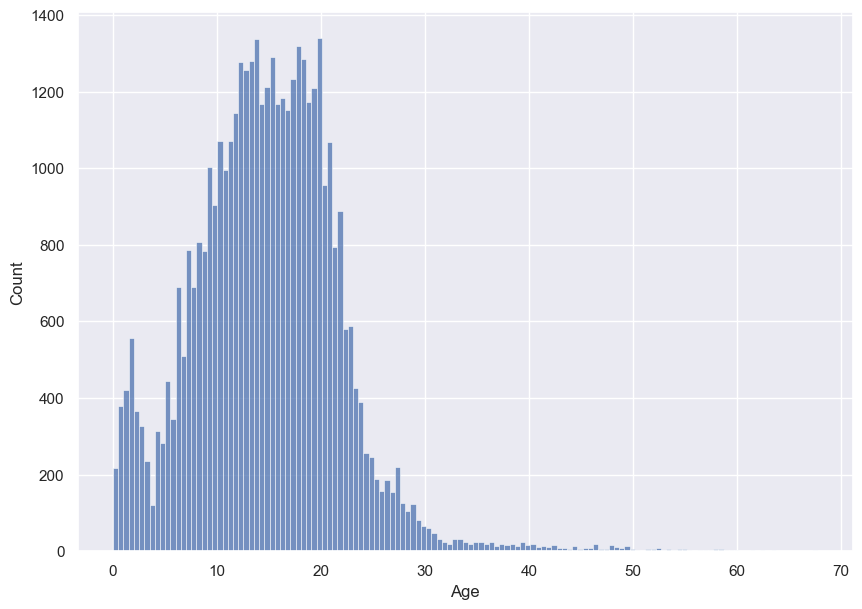

In [51]:
# Age

sns.histplot(cars['Age'])

<Axes: ylabel='Age'>

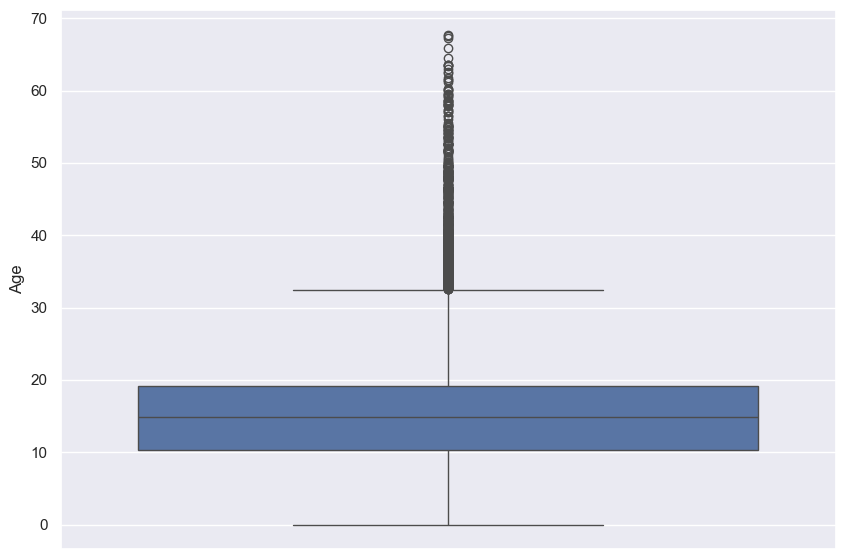

In [52]:
sns.boxplot(y = cars['Age'])

<Axes: xlabel='price', ylabel='Count'>

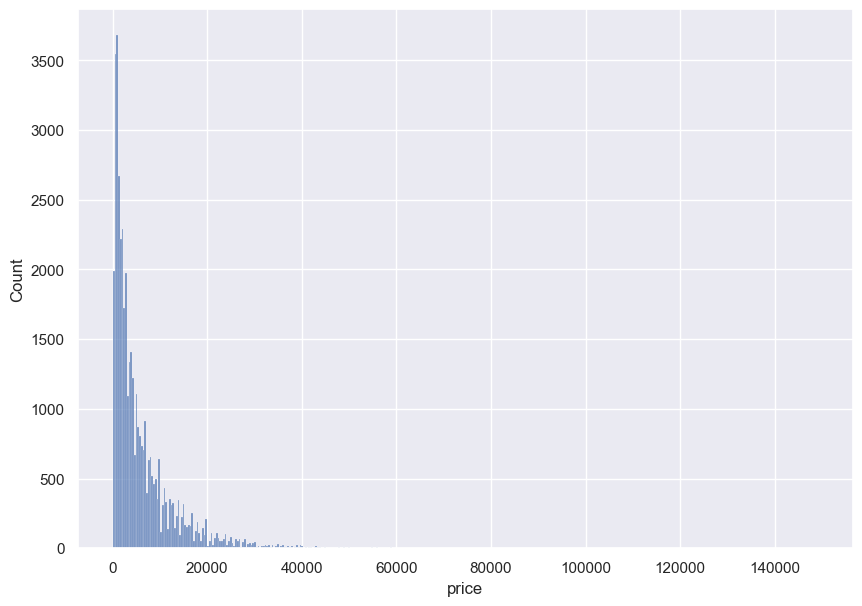

In [53]:
# price

sns.histplot(cars['price'])

<Axes: ylabel='price'>

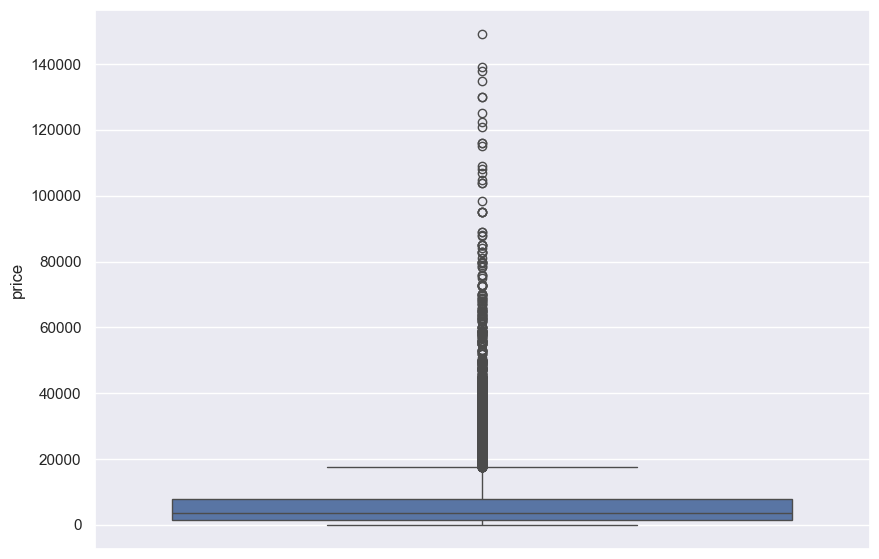

In [54]:
sns.boxplot(y = cars['price'])

<Axes: xlabel='powerPS', ylabel='Count'>

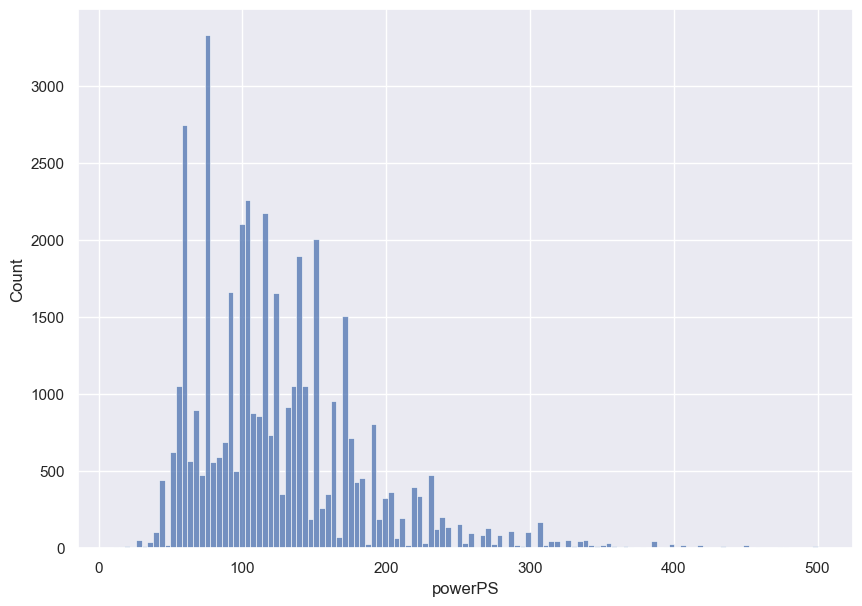

In [55]:
# powerPS

sns.histplot(cars['powerPS'])

<Axes: ylabel='price'>

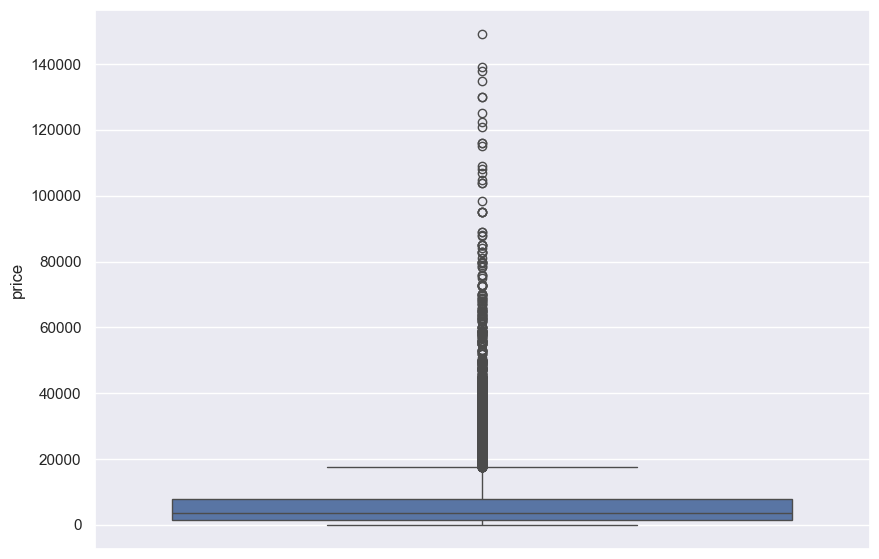

In [56]:
sns.boxplot(y = cars['price'])

### Visualizing parameters after narrowing working range

<Axes: xlabel='Age', ylabel='price'>

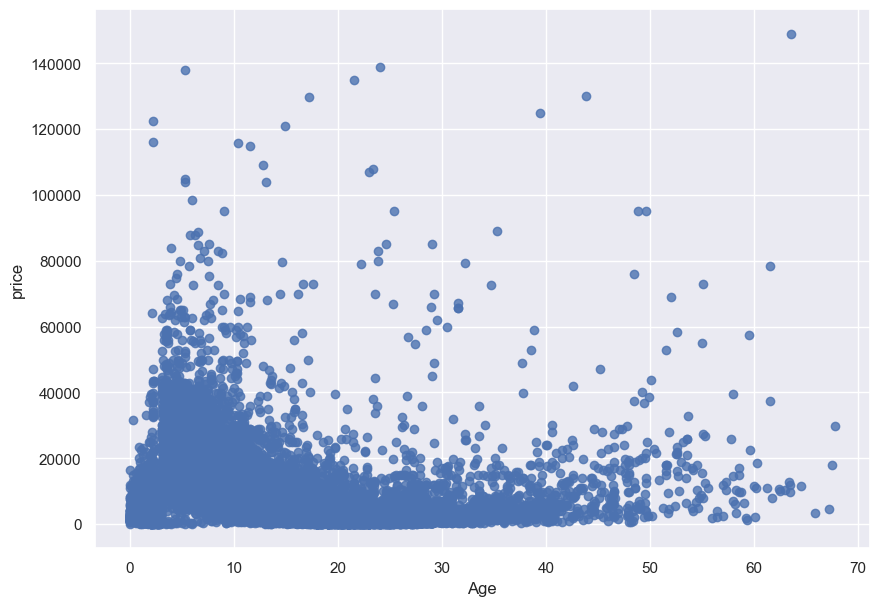

In [58]:
# Age vs price

sns.regplot(x = 'Age', y = 'price', scatter = True, fit_reg = False, data = cars)

In [59]:
# Cars priced higher are newer

# With increase in age, price decreases

# However some cars are priced higher with increase in age

<Axes: xlabel='powerPS', ylabel='price'>

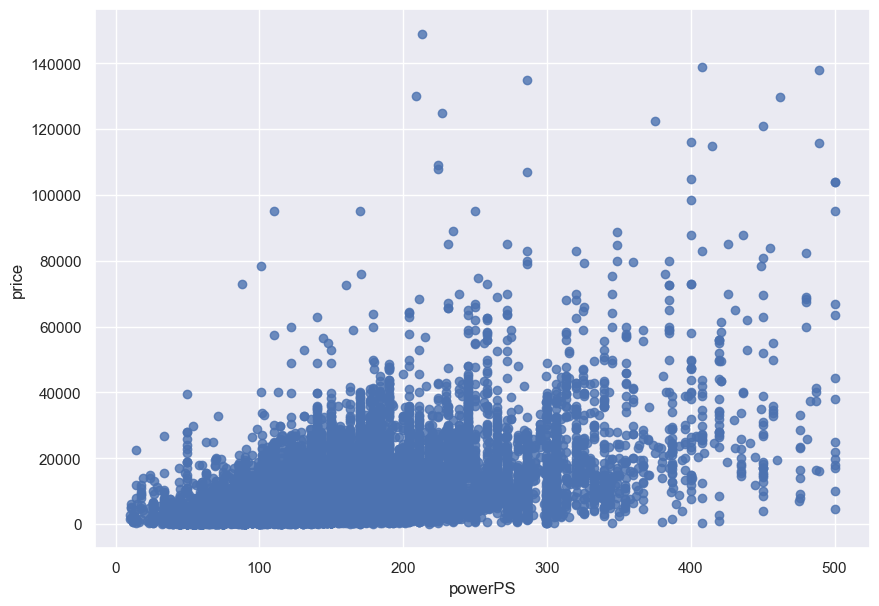

In [60]:
# powerPS vs price

sns.regplot(x = 'powerPS', y = 'price', scatter = True, fit_reg = False, data = cars)

<Axes: xlabel='seller', ylabel='count'>

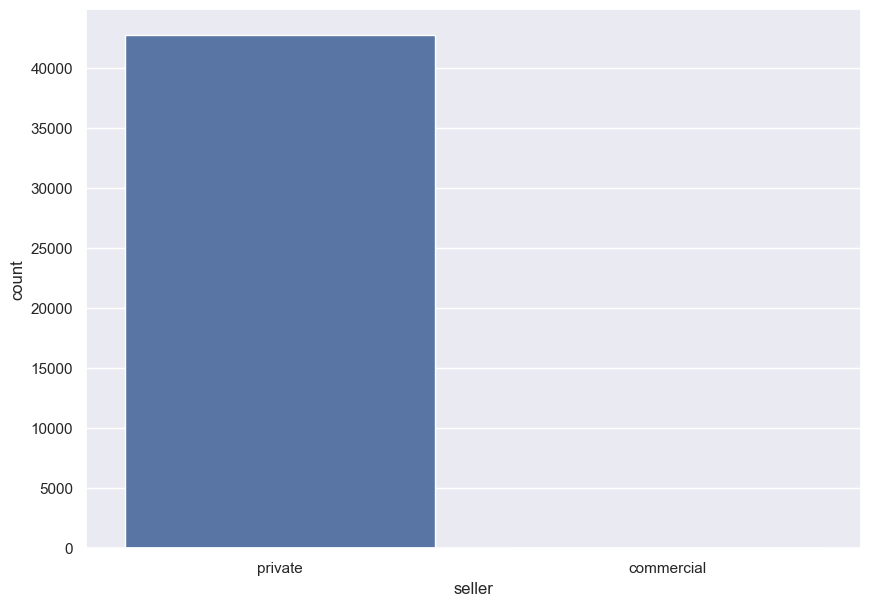

In [61]:
# Variable seller

cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns = 'count',normalize = True)
sns.countplot(x =  'seller', data = cars)
# Fewer cars have 'commercial' ==>> Insignificant

<Axes: xlabel='offerType', ylabel='count'>

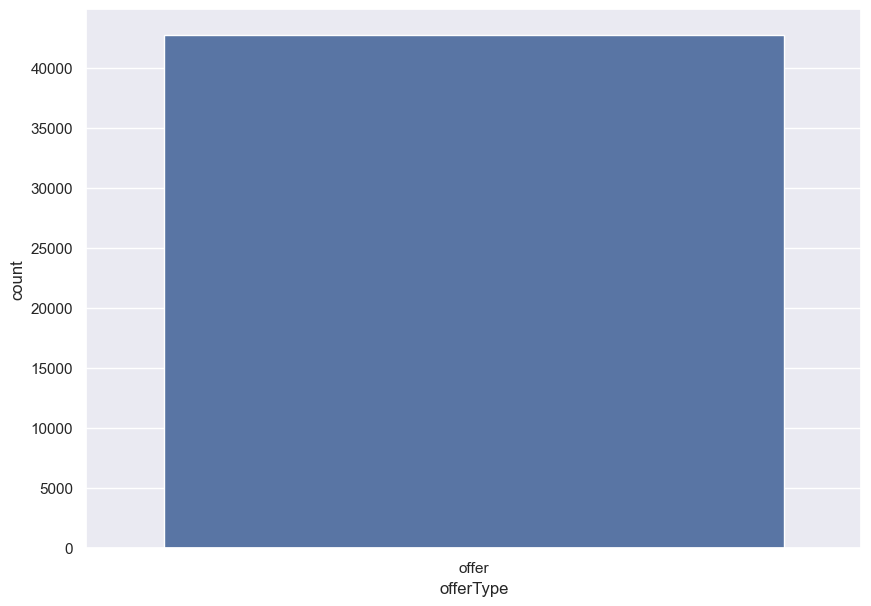

In [62]:
# Variable offerType

cars['offerType'].value_counts()
sns.countplot(x =  'offerType', data = cars)
# All cars have 'offer' ==>> Insignificant

In [63]:
# Variable abtest

cars['abtest'].value_counts()
pd.crosstab(cars['abtest'],columns = 'count', normalize = True)

col_0,count
abtest,
control,0.483
test,0.517


<Axes: xlabel='abtest', ylabel='count'>

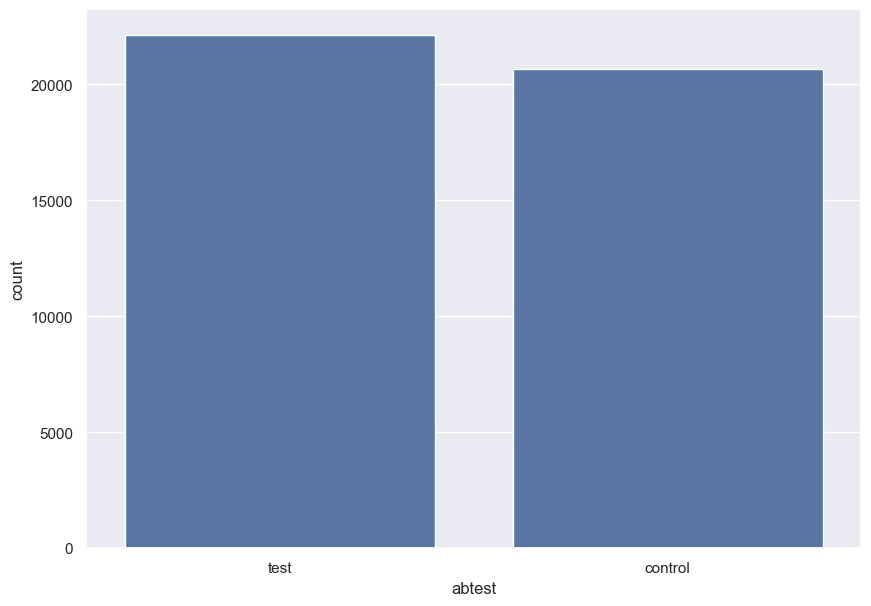

In [64]:
sns.countplot(x = 'abtest', data = cars)

<Axes: xlabel='abtest', ylabel='price'>

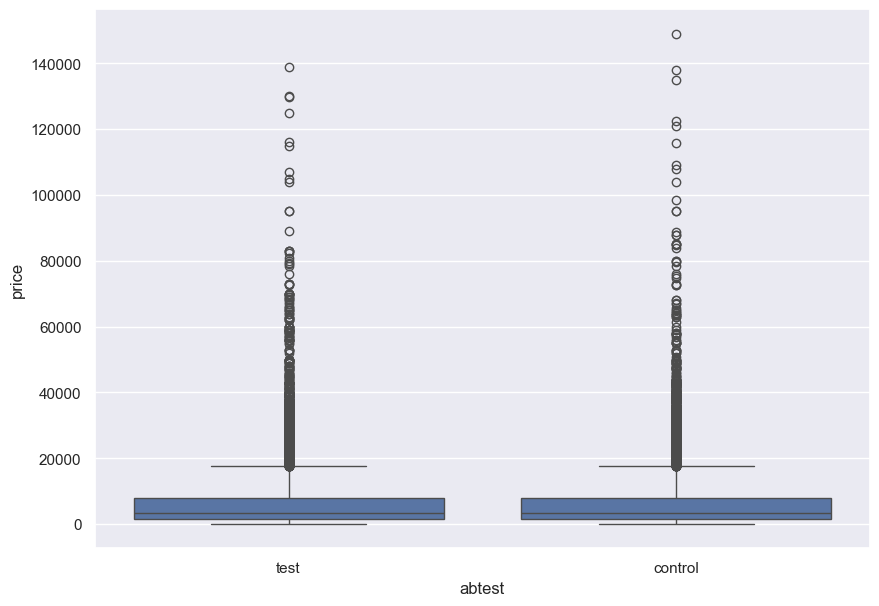

In [65]:
# Equally distributed
sns.boxplot(x = 'abtest', y = 'price', data = cars)
# For every price value there is almost 50-50 distribution
# Does not affect price => Insignificant

In [66]:
# Variable vehicleType

cars['vehicleType'].value_counts()
pd.crosstab(cars['vehicleType'], columns = 'count', normalize = True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<Axes: xlabel='vehicleType', ylabel='count'>

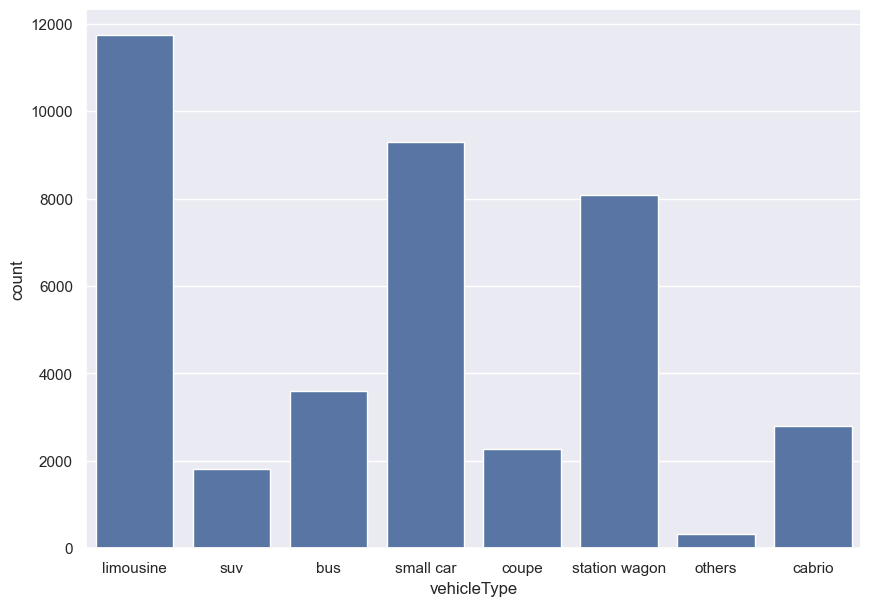

In [67]:
sns.countplot(x = 'vehicleType', data = cars)

<Axes: xlabel='vehicleType', ylabel='price'>

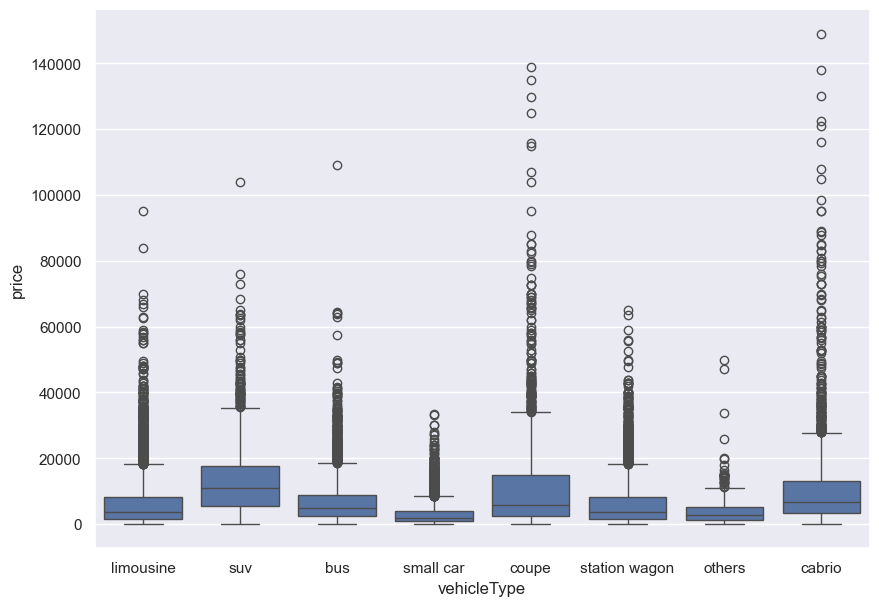

In [68]:
sns.boxplot(x = 'vehicleType', y = 'price', data = cars)
# 8 types- limousine, small cars and station wagons max freq
# vehicleType affects price

In [69]:
# Variable gearbox

cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'], columns = 'count', normalize = True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<Axes: xlabel='gearbox', ylabel='count'>

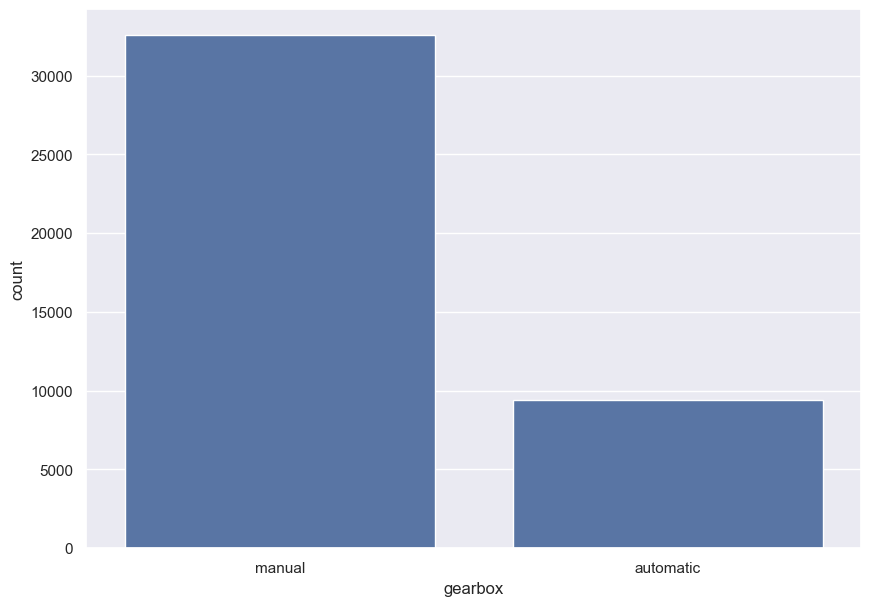

In [70]:
sns.countplot(x = 'gearbox', data = cars)

<Axes: xlabel='gearbox', ylabel='price'>

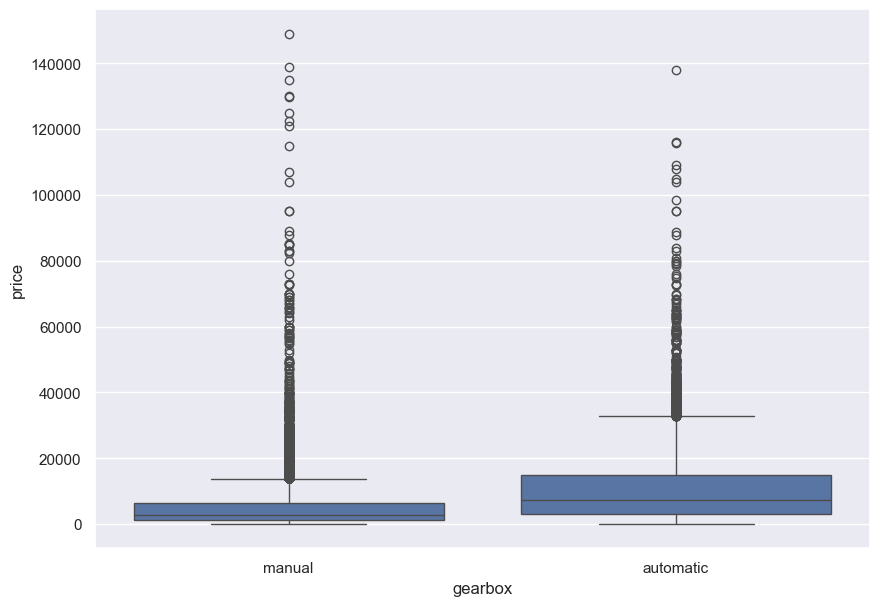

In [71]:
sns.boxplot(x = 'gearbox', y = 'price', data = cars)
# gearbox affects price 

In [72]:
# Variable model

cars['model'].value_counts()

pd.crosstab(cars['model'],columns = 'count', normalize = True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


<Axes: xlabel='model', ylabel='count'>

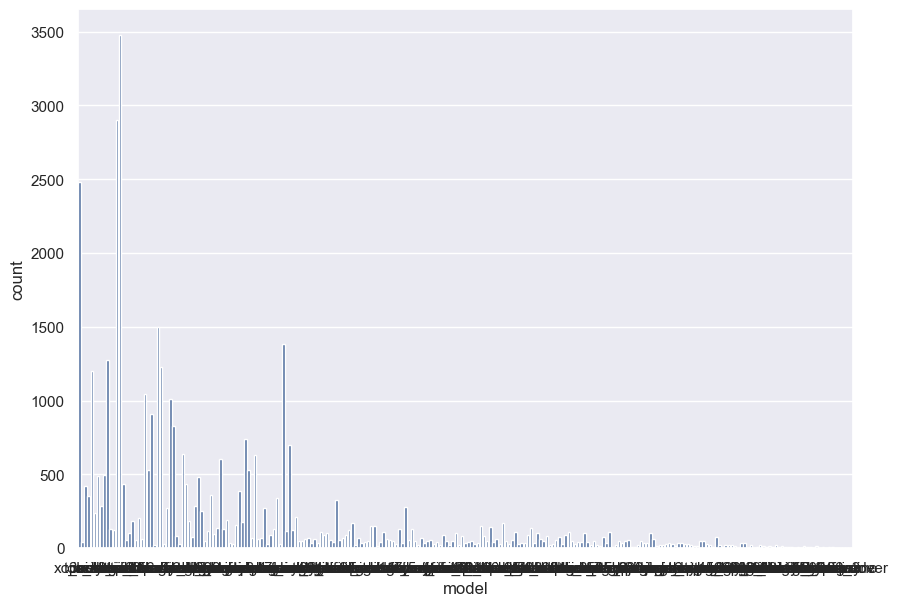

In [73]:
sns.countplot(x = 'model', data = cars)

<Axes: xlabel='model', ylabel='price'>

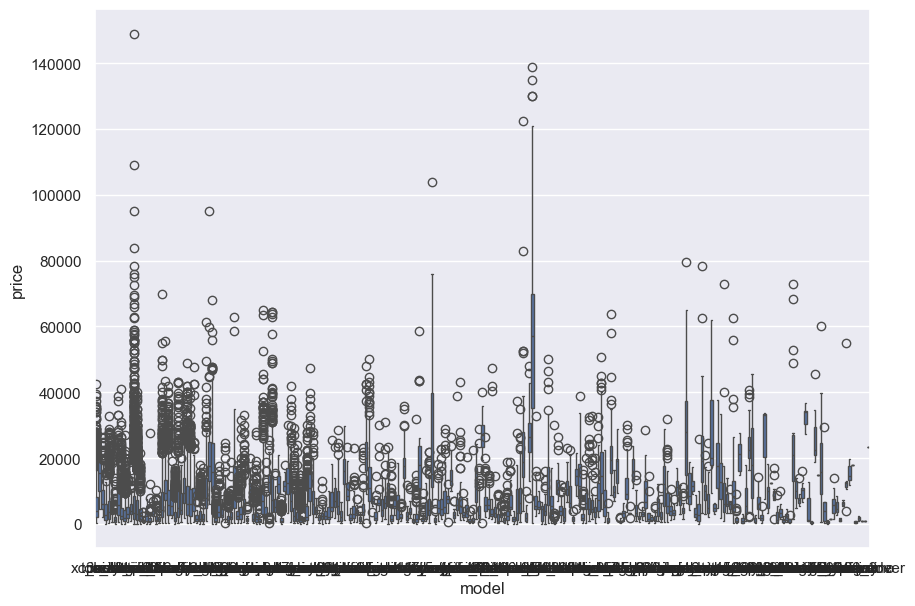

In [74]:
sns.boxplot(x = 'model', y = 'price', data = cars)
# Cars are distributed over many models
# Considered in modelling

In [75]:
# Variable kilometer

cars['kilometer'].value_counts().sort_index()
pd.crosstab(cars['kilometer'], columns = 'count', normalize = True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<Axes: xlabel='kilometer', ylabel='price'>

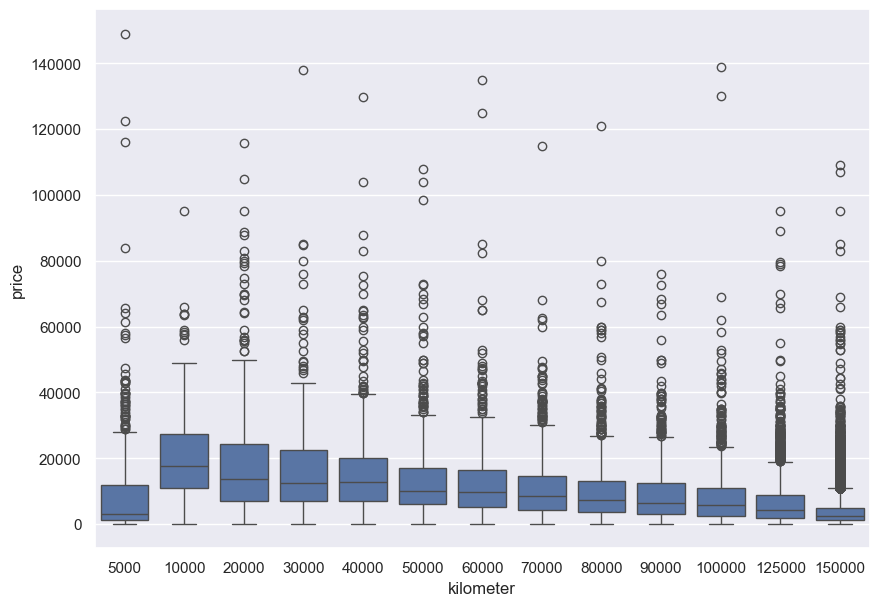

In [76]:
sns.boxplot(x = 'kilometer', y = 'price', data = cars)

In [77]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_17176\4047945983.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['kilometer'], bins = 8 , kde = False)


<Axes: xlabel='kilometer'>

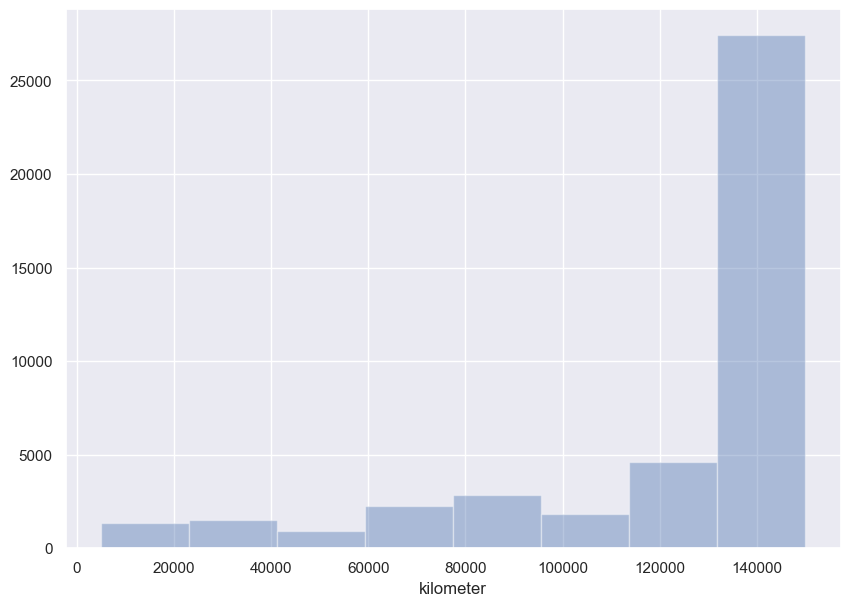

In [78]:
sns.distplot(cars['kilometer'], bins = 8 , kde = False)

<Axes: xlabel='kilometer', ylabel='price'>

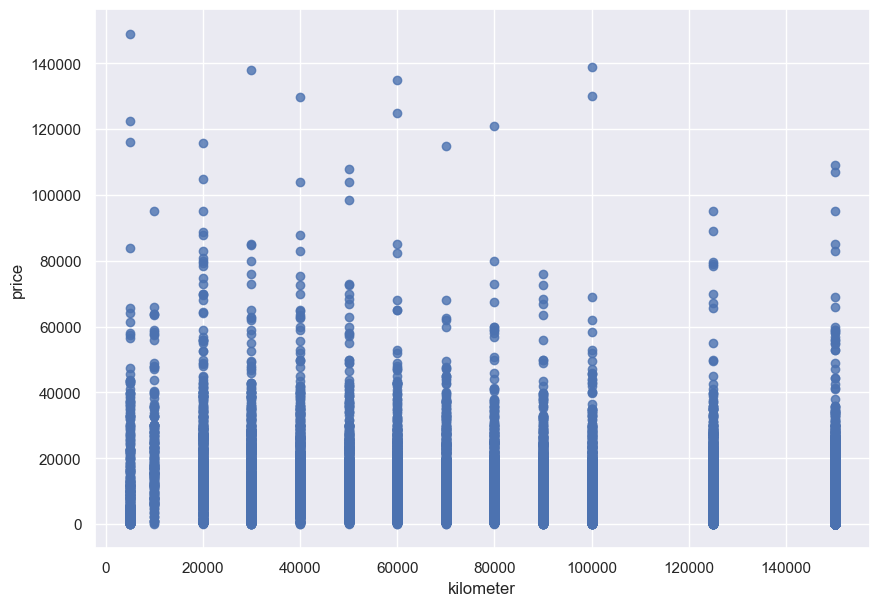

In [79]:
sns.regplot(x = 'kilometer', y = 'price', scatter = True, fit_reg = False, data = cars)
# Considered in modelling

In [80]:
# Variable fuelType

cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'], columns = 'count', normalize = True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<Axes: xlabel='fuelType', ylabel='count'>

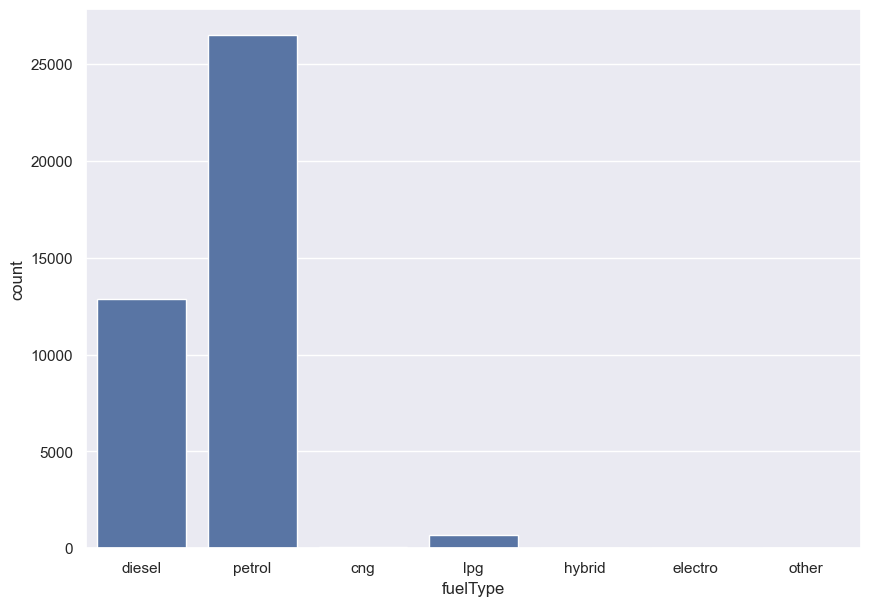

In [81]:
sns.countplot(x = 'fuelType', data = cars)

<Axes: xlabel='fuelType', ylabel='price'>

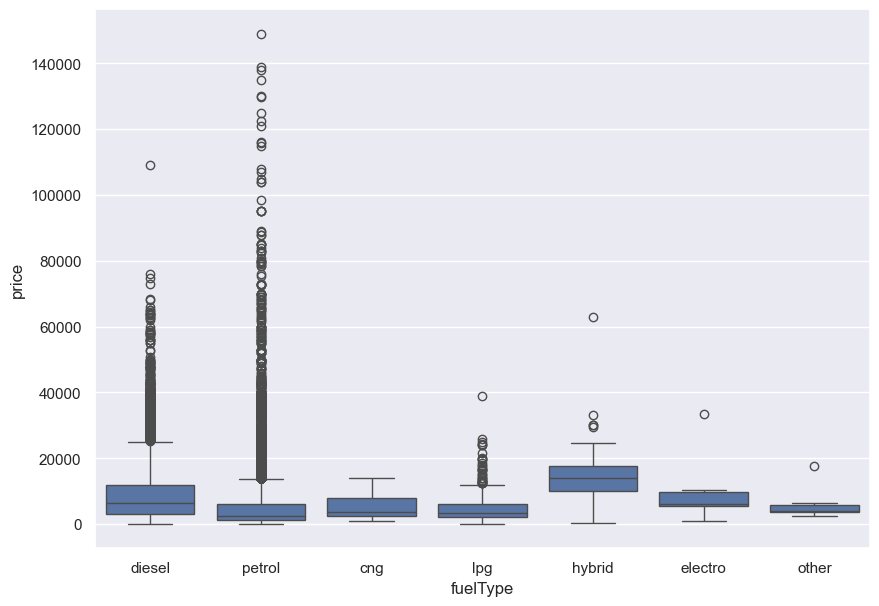

In [82]:
sns.boxplot(x = 'fuelType', y = 'price', data = cars)
# fuelType affects price

In [83]:
# Variable brand
cars['brand'].value_counts()
pd.crosstab(cars['brand'], columns = 'count', normalize = True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


<Axes: xlabel='brand', ylabel='count'>

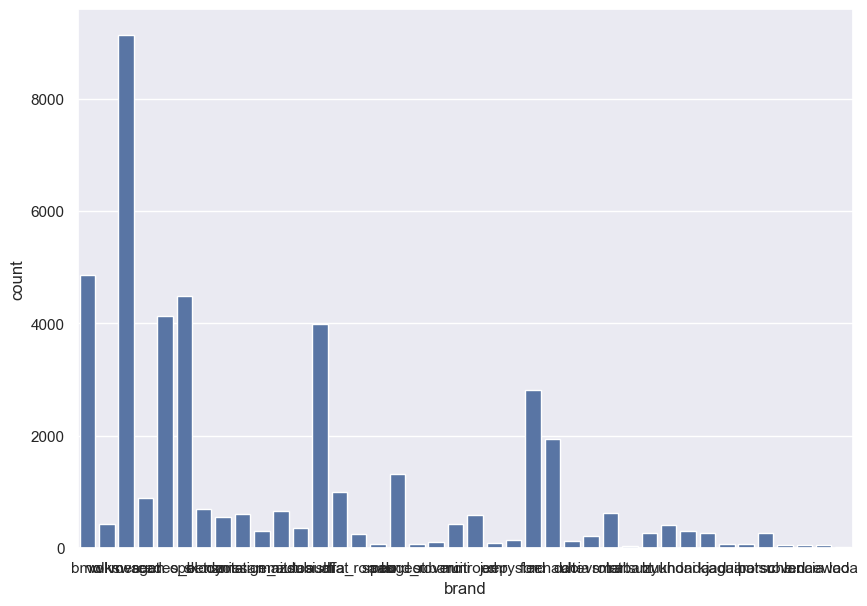

In [84]:
sns.countplot(x = 'brand', data = cars)

<Axes: xlabel='brand', ylabel='price'>

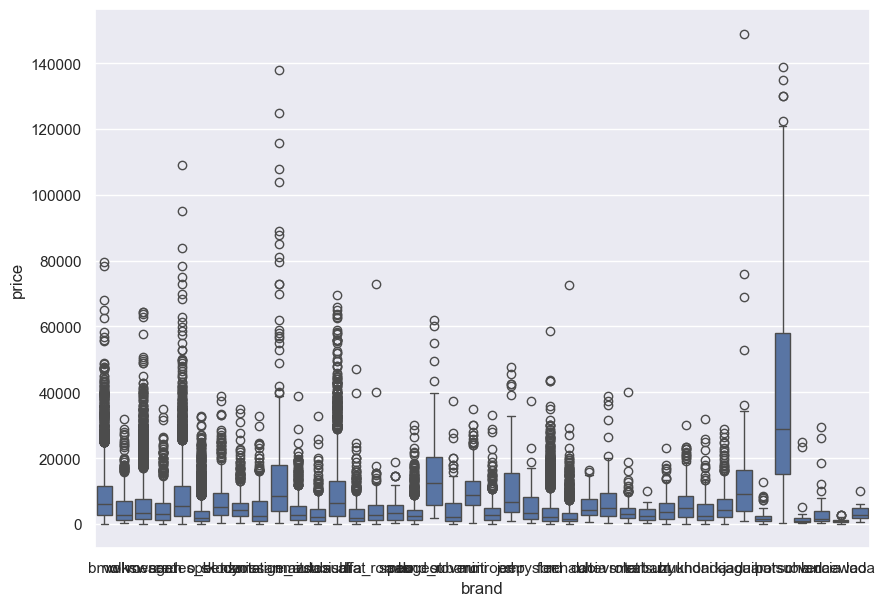

In [85]:
sns.boxplot(x = 'brand', y = 'price', data = cars)
# Cars are distributed over many brands
# Considered for modelling

In [86]:
# Variable notRepairedDamage
# yes- car is damaged but not rectified
# no- car was damaged but has been rectified
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'], columns = 'count', normalize = True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<Axes: xlabel='notRepairedDamage', ylabel='count'>

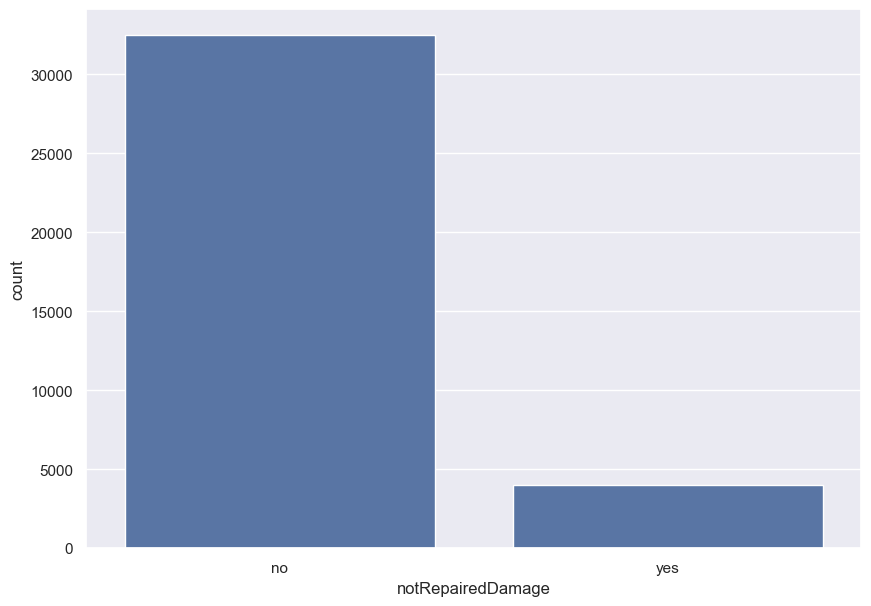

In [87]:
sns.countplot(x = 'notRepairedDamage', data = cars)

<Axes: xlabel='notRepairedDamage', ylabel='price'>

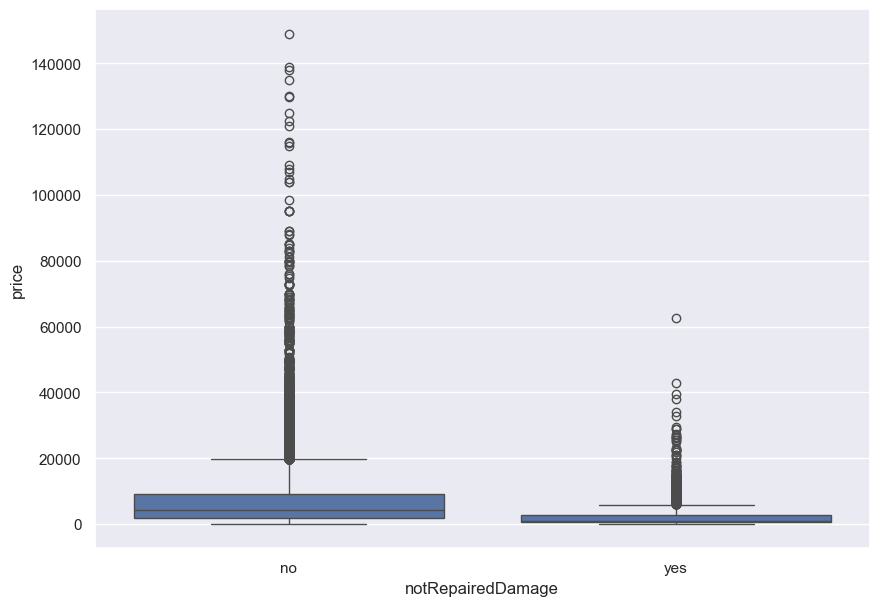

In [88]:
sns.boxplot(x = 'notRepairedDamage', y = 'price', data = cars)
# As expected, the cars that require the damages to be repaired
# fall under lower price ranges

### Removing Insignificant variables

In [90]:
col = ['seller','offerType','abtest']
cars = cars.drop(columns = col, axis = 1)
cars_copy = cars.copy()

In [91]:
cars_copy.head(10)

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
5,988,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.170
7,1399,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.920
8,4680,station wagon,manual,122,vectra,150000,petrol,opel,no,14.000
9,8340,limousine,automatic,140,octavia,125000,diesel,skoda,no,13.330
10,1870,limousine,manual,82,a_klasse,150000,petrol,mercedes_benz,no,17.080


### Correlation

In [93]:
cars_select1 = cars.select_dtypes(exclude = [object])
correlation = cars_select1.corr()
round(correlation, 3)   
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending = False)[1:] 

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [94]:
# We are going to build a Linear Regression and Random Forest model
# on two sets of data.
# 1. Data obtained by omitting rows with any missing value
# 2. Data obtained by imputing the missing values 

### Omitting missing values

In [96]:
cars_omit = cars.dropna(axis = 0) 

In [97]:
# Converting categorical variables to dummy variables

cars_omit = pd.get_dummies(cars_omit,drop_first = True) 

### Importing necessary libraries

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Modelling building with Omitted data

In [101]:
# Separating input and output features

x1 = cars_omit.drop(['price'], axis = 'columns', inplace = False)
y1 = cars_omit['price']

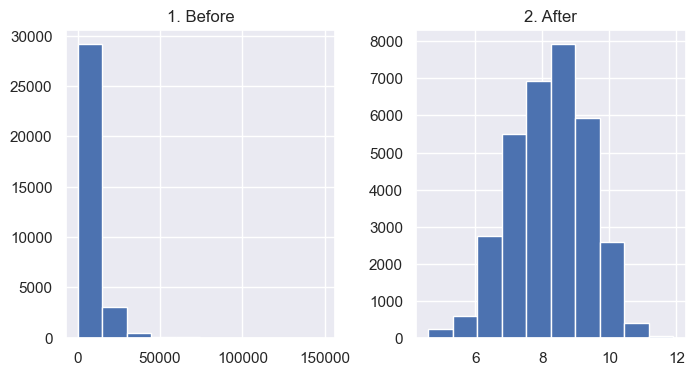

In [102]:
# Plotting the variable price

prices = pd.DataFrame({
    "1. Before": y1,
    "2. After": np.log(y1)
})

prices.hist(figsize = (8,4))
plt.show()

In [103]:
# Transforming price as a logarithmic value

y1 = np.log(y1)

In [104]:
# Splitting data into test and train

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


### Baseline Model for omitted Data

In [106]:
# Making a base model by using test data mean value
# This is to set a benchmark and to compare with our regression model

In [107]:
# finding the mean for test data value

base_pred = np.mean(y_test)
print(base_pred)

8.249615787653267


In [108]:
# Repeating same value till length of test data

base_pred = np.repeat(base_pred, len(y_test))

In [109]:
# finding the RMSE - Root Mean Spuare Error

base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
                               
print(base_root_mean_square_error)

1.1274483657478247


### Linear Regression with Omitted data 

In [111]:
# Setting intercept as true
lgr = LinearRegression(fit_intercept = True)

In [112]:
# Model

model_lin1 = lgr.fit(X_train,y_train)

In [113]:
# Predicting model on test set

cars_predictions_lin1 = lgr.predict(X_test)

In [114]:
# Computing MSE and RMSE

lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513857


In [115]:
# R squared value

r2_lin_test1 = model_lin1.score(X_test,y_test)
r2_lin_train1 = model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649229 0.7800936978183916


<Axes: ylabel='price'>

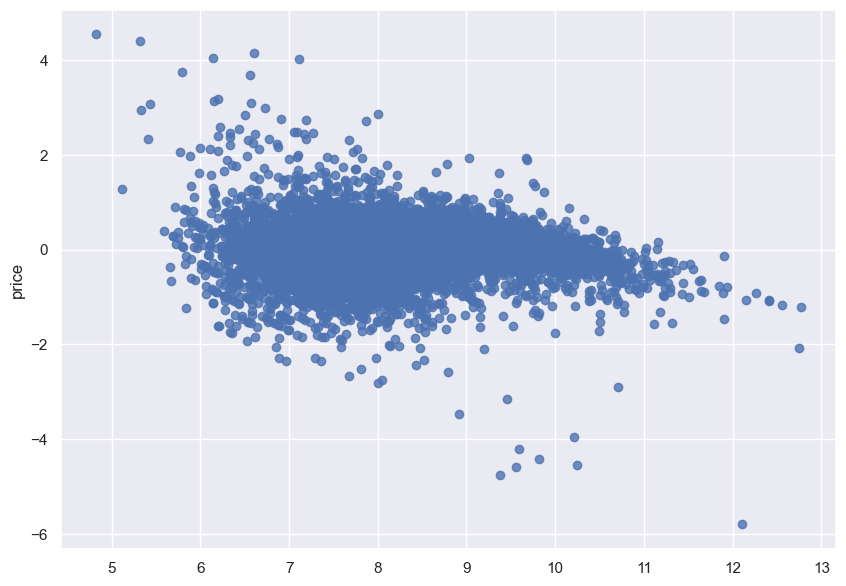

In [213]:
# Regression diagnostics- Residual plot analysis

residuals1 = y_test - cars_predictions_lin1
sns.regplot(x = cars_predictions_lin1, y = residuals1, scatter = True, fit_reg = False)

In [215]:
residuals1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

### Random Forest with Omitted Data

In [227]:
# Model parameters

rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 100, min_samples_split = 10, 
                           min_samples_leaf = 4, random_state = 1)

In [229]:
# Model

model_rf1 = rf.fit(X_train, y_train)

In [231]:
# Predicting model on test set

cars_predictions_rf1 = rf.predict(X_test)

In [233]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4904583165147938


In [235]:
# R squared value
r2_rf_test1 = model_rf1.score(X_test,y_test)
r2_rf_train1 = model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)  

0.8107608958978608 0.8323308826781988


### Imputed Data

In [244]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype == 'float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [246]:
# Converting categorical variables to dummy variables

cars_imputed = pd.get_dummies(cars_imputed,drop_first = True)

### Model building with Imputed data

In [252]:
# Separating input and output feature

x2 = cars_imputed.drop(['price'], axis = 'columns', inplace = False)
y2 = cars_imputed['price']

array([[<Axes: title={'center': '1. Before'}>,
        <Axes: title={'center': '2. After'}>]], dtype=object)

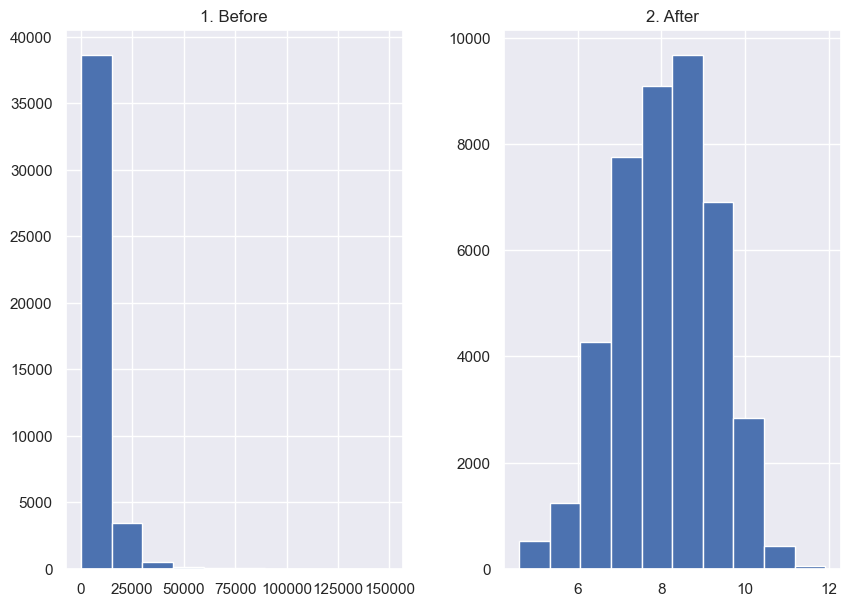

In [254]:
# Plotting the variable price

prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

In [258]:
# Transforming price as a logarithmic value

y2 = np.log(y2)

In [260]:
# Splitting data into test and train

X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size = 0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


### Baseline Model for Imputed Data 

In [263]:
# Making a base model by using test data mean value

# This is to set a benchmark and to compare with our regression model

In [265]:
# finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

2.076609855136447


In [267]:
# Repeating same value till length of test data

base_pred = np.repeat(base_pred, len(y_test1))

In [269]:
# finding the RMSE

base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
                               
print(base_root_mean_square_error_imputed)

0.1526810336802738


### Linear Regression with Imputed Data

In [274]:
# Setting intercept as true

lgr2 = LinearRegression(fit_intercept = True)

In [276]:
# Model

model_lin2 = lgr2.fit(X_train1,y_train1)

In [278]:
# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)

In [284]:
# Computing MSE and RMSE

lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.08834984324051708


In [282]:
# R squared value

r2_lin_test2 = model_lin2.score(X_test1,y_test1)
r2_lin_train2 = model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.6651568772916547 0.670774811124583


### Random Forest with Imputed data 

In [291]:
# Model parameters

rf2 = RandomForestRegressor(n_estimators = 100,max_features = 'sqrt', max_depth = 100, min_samples_split = 10, 
                            min_samples_leaf = 4, random_state = 1)

In [293]:
# Model
model_rf2 = rf2.fit(X_train1,y_train1)

In [295]:
# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)

In [297]:
# Computing MSE and RMSE

rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.07645574233233729


In [299]:
# R squared value

r2_rf_test2 = model_rf2.score(X_test1,y_test1)
r2_rf_train2 = model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)        

0.7492447493449357 0.7771568437762179


### Metrics for models built from data where missing values were omitted

In [345]:
# Final output

print("R squared value for train from Linear Regression =  %s"% r2_lin_train1)

R squared value for train from Linear Regression =  0.7800936978183916


In [313]:
print("R squared value for test from Linear Regression =  %s"% r2_lin_test1)

R squared value for test from Linear Regression =  0.7658615091649229


In [315]:
print("R squared value for train from Random Forest =  %s"% r2_rf_train1)

R squared value for train from Random Forest =  0.8323308826781988


In [317]:
print("R squared value for test from Random Forest =  %s"% r2_rf_test1)

R squared value for test from Random Forest =  0.8107608958978608


In [319]:
print("Base RMSE of model built from data where missing values were omitted = %s"%base_root_mean_square_error)

Base RMSE of model built from data where missing values were omitted = 1.1274483657478247


In [321]:
print("RMSE value for test from Linear Regression =  %s"% lin_rmse1)

RMSE value for test from Linear Regression =  0.5455481266513857


In [323]:
print("RMSE value for test from Random Forest =  %s"% rf_rmse1)

RMSE value for test from Random Forest =  0.4904583165147938


### Metrics for models built from data where missing values were imputed

In [331]:
print("R squared value for train from Linear Regression =  %s"% r2_lin_train2)

R squared value for train from Linear Regression =  0.670774811124583


In [333]:
print("R squared value for test from Linear Regression =  %s"% r2_lin_test2)

R squared value for test from Linear Regression =  0.6651568772916547


In [335]:
print("R squared value for train from Random Forest =  %s"% r2_rf_train2)

R squared value for train from Random Forest =  0.7771568437762179


In [337]:
print("R squared value for test from Random Forest =  %s"% r2_rf_test2)

R squared value for test from Random Forest =  0.7492447493449357


In [339]:
print("Base RMSE of model built from data where missing values were imputed = %s"%base_root_mean_square_error_imputed)

Base RMSE of model built from data where missing values were imputed = 0.1526810336802738


In [341]:
print("RMSE value for test from Linear Regression =  %s"% lin_rmse2)

RMSE value for test from Linear Regression =  0.08834984324051708


In [343]:
print("RMSE value for test from Random Forest =  %s"% rf_rmse2)

RMSE value for test from Random Forest =  0.07645574233233729
